# NYC Taxi & Limousine Commission Dataset Analysis

## Introduction:

<b>What is Taxi and Limousine Commission(TLC)?</b>

Created in 1971, The New York City Taxi and Limousine Commission(TLC) is an agency who takes care of licensing and regulating New York's green and yellow taxi cabs, for-hire vehicles(luxury cars, Limousine, etc.), commuter vans and paratransit vehicles. These taxi cabs are operated by private companies. As per the official [website](https://www1.nyc.gov/site/tlc/about/abouttlc.page#:~:text=The%20New%20York%20City%20Taxi,commuter%20vans%2C%20and%20paratransit%20vehicles.) there are 200k TLC licensees complete more than 1M trips each day. 

<b><i>Yellow and Green Taxi:</i></b>

The Yellow taxis(yellow painted medallion taxis), which is widely recognizable symbols of the city are able to pick passengers anywhere in the five boroughs of the city. The Green taxis(painted apple green street hail livery vehicles) commonly known as "boro taxis", began to appear in August, 2013 and allowed to pick up passengers in Upper Manhattan, the Bronx, Brooklyn, Queens (excluding LaGuardia Airport and John F. Kennedy International Airport), and Staten Island. Both the taxi type has similar fare type structures. 

The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. 
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

## Data Source:

The trip records data including yellow taxi, green taxi, for-hire vehicles, and high-volume for-hire vehicles are open source data, available for free monthly wise [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), and legal to access and for use as well. 

csv file source :  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2020-03.csv

columns details: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

        
## Data Selection and Objective:


<i><b>I have selected the green taxi trip records of <b>March-2020</b>. The objective to select the data from this particular month is to analyse how green taxi service affected due to COVID-19 scenario. Other than that, here are some below points which also I am going to analyse as well.</b></i>

<li>The highest and least visited locations by green taxi in New York City.</li>
<li>Kinds of trips preferred by travellers.</li>
<li>Payment methods opted by travellers.</li>

## Data Properties:

The dataset consists of below number of rows and columns:

<li>Rows    : 223406</li>
<li>Columns : 20</li>

## 1. Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt #for plotting

import warnings
warnings.filterwarnings("ignore")

In [3]:
##to get the file size
print("The size of the dataset is",round(os.stat('green_tripdata_2020-03.csv').st_size/10**6,2), "MB.") 

The size of the dataset is 20.19 MB.


## 2. Importing Data/ Reading csv file

In [4]:
#using pandas read_csv to read the data as a dataframe
taxi_df = pd.read_csv("green_tripdata_2020-03.csv", low_memory=False) #using low_memory as False to avoid warning

In [5]:
print("Dataset shape :",taxi_df.shape)

Dataset shape : (223406, 20)


<i><b>The nyc green taxt dataset contains more than 200k rows and 20 feaures/columns.</b></i>

In [6]:
#printing top 5 rows of the dataset
taxi_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2020-03-01 00:20:18,2020-03-01 00:45:29,N,1.0,41,13,1.0,8.24,26.5,0.5,0.5,7.64,0.0,NaN,0.3,38.19,1.0,1.0,2.75
1,2.0,2020-03-01 00:15:42,2020-03-01 00:44:36,N,1.0,181,107,1.0,4.87,21.0,0.5,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
2,2.0,2020-03-01 00:36:18,2020-03-01 00:41:03,N,1.0,41,166,1.0,0.69,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2.0,1.0,0.00
3,1.0,2020-03-01 00:22:14,2020-03-01 00:32:57,N,1.0,129,7,1.0,1.80,9.0,0.5,0.5,0.00,0.0,NaN,0.3,10.30,2.0,1.0,0.00
4,2.0,2020-03-01 00:07:22,2020-03-01 00:14:16,N,1.0,74,152,1.0,1.25,7.0,0.5,0.5,2.49,0.0,NaN,0.3,10.79,1.0,1.0,0.00


In [7]:
##printing below 5 rows of the dataset
taxi_df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
223401,NaN,2020-03-31 22:00:00,2020-03-31 22:13:00,NaN,NaN,173,82,NaN,2.28,10.00,0.0,0.0,2.06,0.0,NaN,0.3,12.36,NaN,NaN,NaN
223402,NaN,2020-03-31 23:21:00,2020-03-31 23:35:00,NaN,NaN,159,241,NaN,5.29,15.44,0.0,0.0,0.00,0.0,NaN,0.3,15.74,NaN,NaN,NaN
223403,NaN,2020-03-31 23:38:00,2020-03-31 23:50:00,NaN,NaN,19,64,NaN,3.16,14.32,0.0,0.0,0.00,0.0,NaN,0.3,14.62,NaN,NaN,NaN
223404,NaN,2020-03-31 23:13:00,2020-03-31 23:42:00,NaN,NaN,222,97,NaN,7.87,62.37,0.0,0.0,0.00,0.0,NaN,0.3,62.67,NaN,NaN,NaN
223405,NaN,2020-03-31 23:55:00,2020-04-01 00:15:00,NaN,NaN,247,81,NaN,8.44,17.94,0.0,0.0,0.00,0.0,NaN,0.3,18.24,NaN,NaN,NaN


In [8]:
#getting column names
taxi_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

### 2.1 Dataset Information

In [9]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223406 entries, 0 to 223405
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               176287 non-null  float64
 1   lpep_pickup_datetime   223406 non-null  object 
 2   lpep_dropoff_datetime  223406 non-null  object 
 3   store_and_fwd_flag     176287 non-null  object 
 4   RatecodeID             176287 non-null  float64
 5   PULocationID           223406 non-null  int64  
 6   DOLocationID           223406 non-null  int64  
 7   passenger_count        176287 non-null  float64
 8   trip_distance          223406 non-null  float64
 9   fare_amount            223406 non-null  float64
 10  extra                  223406 non-null  float64
 11  mta_tax                223406 non-null  float64
 12  tip_amount             223406 non-null  float64
 13  tolls_amount           223406 non-null  float64
 14  ehail_fee              0 non-null   

#### Observations:
From primary information analysis I found out:

<li>It contains 15-float64, 2-int64, and 3-object datatypes.</li>
<li>"ehail_fee" is an empty feature/column.</li>
<li>7 columns has some null values(NaN).</li>

### 2.2 Columns description

In [10]:
taxi_df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,176287.000000,176287.000000,223406.000000,223406.000000,176287.000000,223406.000000,223406.000000,223406.000000,223406.000000,223406.000000,223406.000000,0.0,223406.000000,223406.000000,176287.000000,176286.000000,176287.000000
mean,1.836352,1.117190,106.988205,127.839673,1.305553,7.086498,14.133135,0.331399,0.385903,0.905952,0.306200,NaN,0.295825,16.712925,1.482066,1.027297,0.439686
std,0.369957,0.705263,70.609866,76.219985,0.967555,607.020097,11.886578,0.600867,0.213360,2.364901,1.416804,NaN,0.042139,13.159977,0.524288,0.162947,1.007972
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-2.550000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,62.000000,1.000000,1.060000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,81.000000,127.000000,1.000000,1.980000,10.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,12.350000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,4.180000,17.000000,0.500000,0.500000,1.460000,0.000000,NaN,0.300000,20.150000,2.000000,1.000000,0.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,141874.710000,390.000000,14.550000,3.550000,449.970000,53.610000,NaN,0.300000,462.270000,5.000000,2.000000,2.750000


#### Observations:
In column descriptions I found out:
<li>Many numerical columns has extreme maximum values.</li>
<li>Amount releated column/feature has negative values.</li>

## 2. Data Cleaning:

Data cleaning is an importrant part of primary data analysis. Below are the following things which I am going to analyse here.

<li>Irrelevant Columns</li>
<li>Missing values</li>
<li>Duplicate Columns</li>

### 2.1 Drop Columns

In [11]:
total_non_null_values = taxi_df["ehail_fee"].notnull().sum()
print("There are {} non null values present in the 'ehail_fee' column.".format(total_non_null_values))

There are 0 non null values present in the 'ehail_fee' column.


In [12]:
#as we can see above, "ehail_fee" contains all values as null. So this will irrelevant to our analysis.
#Hence removed it.
taxi_df_m1 = taxi_df.drop(columns = ["ehail_fee"])

### 2.2 Missing Value analysis

In [13]:
#getting missing value counts 
mis_val_cnt = taxi_df_m1.isnull().sum()
#getting missing value percentage
mis_val_percent = 100 * ((taxi_df_m1.isnull().sum()) / (taxi_df_m1.shape[0]))

#creating dataframe and renaming column
mis_val_table = pd.concat([mis_val_cnt, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0:"Mssing Values", 1:"Missing Value Counts"})

mis_val_table

,Mssing Values,Missing Value Counts
VendorID,47119,21.091197
lpep_pickup_datetime,0,0.000000
lpep_dropoff_datetime,0,0.000000
store_and_fwd_flag,47119,21.091197
RatecodeID,47119,21.091197
PULocationID,0,0.000000
DOLocationID,0,0.000000
passenger_count,47119,21.091197
trip_distance,0,0.000000
fare_amount,0,0.000000


Observation:
<li>I found out that 7 columns contain around 21% missing values.</li>

In [14]:
#getting missing value rows of vendor ID
taxi_df_m1[taxi_df_m1["VendorID"].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
176287,NaN,2020-03-01 00:17:00,2020-03-01 00:39:00,NaN,NaN,61,76,NaN,4.09,23.31,2.75,0.0,0.00,0.00,0.3,26.36,NaN,NaN,NaN
176288,NaN,2020-03-01 00:07:00,2020-03-01 01:12:00,NaN,NaN,254,117,NaN,36.15,77.04,2.75,0.0,0.00,8.41,0.3,88.50,NaN,NaN,NaN
176289,NaN,2020-03-01 00:05:00,2020-03-01 00:21:00,NaN,NaN,26,11,NaN,3.96,20.52,2.75,0.0,0.00,0.00,0.3,23.57,NaN,NaN,NaN
176290,NaN,2020-03-01 00:27:00,2020-03-01 00:46:00,NaN,NaN,25,177,NaN,3.97,19.15,2.75,0.0,0.00,0.00,0.3,22.20,NaN,NaN,NaN
176291,NaN,2020-03-01 00:35:00,2020-03-01 00:40:00,NaN,NaN,10,10,NaN,1.16,15.45,2.75,0.0,0.00,0.00,0.3,18.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223401,NaN,2020-03-31 22:00:00,2020-03-31 22:13:00,NaN,NaN,173,82,NaN,2.28,10.00,0.00,0.0,2.06,0.00,0.3,12.36,NaN,NaN,NaN
223402,NaN,2020-03-31 23:21:00,2020-03-31 23:35:00,NaN,NaN,159,241,NaN,5.29,15.44,0.00,0.0,0.00,0.00,0.3,15.74,NaN,NaN,NaN
223403,NaN,2020-03-31 23:38:00,2020-03-31 23:50:00,NaN,NaN,19,64,NaN,3.16,14.32,0.00,0.0,0.00,0.00,0.3,14.62,NaN,NaN,NaN
223404,NaN,2020-03-31 23:13:00,2020-03-31 23:42:00,NaN,NaN,222,97,NaN,7.87,62.37,0.00,0.0,0.00,0.00,0.3,62.67,NaN,NaN,NaN


In [15]:
#dropping missing values column
taxi_df_m2 = taxi_df_m1.dropna()
taxi_df_m2.shape

(176286, 19)

Here I have dropped all null values present in the dataset. This is due to all null values present at the same time in the rows.

### 2.3 Duplicate Data

In [16]:
#checking for duplicate/redundent records in the entire dataframe row wise
taxi_df_m2[taxi_df_m2.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


#### Observation:
1. Missing values from entire dataframe are cleaned.
2. No duplicate record is found.
3. Removed "ehail_fee", due to no record found in the entire feature.

<h1>Analysis with Visualization for easy understanding.</h1>

## 3. Exploratory Data Analysis

Here I have done column wise exploratory data analysis(includes univariate, and bivariate) and plotted some figures. This part also includes outliers, anomaly detection and removal.

In [17]:
#bar plot using pandas
def bar_plot(dataframe, input_column, x_label, y_label, title):
    """
    Bar plot function using pandas plot attribute
    Input:
    ------
        dataframe : input dataframe
        input_column : column to be analysed
        xlabel : x axis name
        ylabel : y axis name
        title : header or titile of the dataframe
    Returns:
    -------
        None
    """
    #getting bar plot
    plot = dataframe[input_column].value_counts().sort_index().plot(kind="bar")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### 3.1 VendorID 

<i><b>A code indicating the TPEP provider that provided the record.</b></i>

<li> 1 = Creative Mobile Technologies, LLC</li>
<li> 2 = VeriFone Inc</li>

In [18]:
#print unique values with their respective counts
taxi_df_m2["VendorID"].value_counts().sort_index()

1.0     28848
2.0    147438
Name: VendorID, dtype: int64

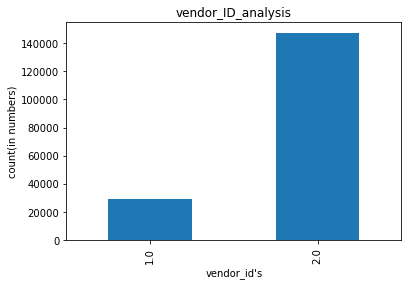

In [19]:
bar_plot(taxi_df_m2, "VendorID", "vendor_id's", "count(in numbers)", "vendor_ID_analysis")

Observation:
    
<li>From above analysis it is clear that vendor_id 2.0 is dominating over first one.</li>
<li>vendor_id 2.0 is the most popular among passangers.</li>    

### 3.2 store_and_fwd_flag

<i><b>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.</b></i>

<li> Y= store and forward trip</li>
<li> N= not a store and forward trip</li>


In [20]:
taxi_df_m2["store_and_fwd_flag"].value_counts().sort_index()

N    175812
Y       474
Name: store_and_fwd_flag, dtype: int64

### 3.3 RatecodeID

<b><i>The final rate code in effect at the end of the trip.</i></b>

<li> 1 = Standard rate
<li> 2 = JFK
<li> 3 = Newark
<li> 4 = Nassau or Westchester
<li> 5 = Negotiated fare
<li> 6 = Group ride

In [21]:
taxi_df_m2["RatecodeID"].value_counts().sort_index()

1.0    170824
2.0       319
3.0        98
4.0       138
5.0      4903
6.0         4
Name: RatecodeID, dtype: int64

### 3.4 DOLocationID

<b><i>TLC Taxi Zone in which the taximeter was disengaged.</i></b>

In [22]:
print("There are total {} types of 'DOLocationID' present in the datatset.".
      format(len(taxi_df_m2["DOLocationID"].unique())))

There are total 257 types of 'DOLocationID' present in the datatset.


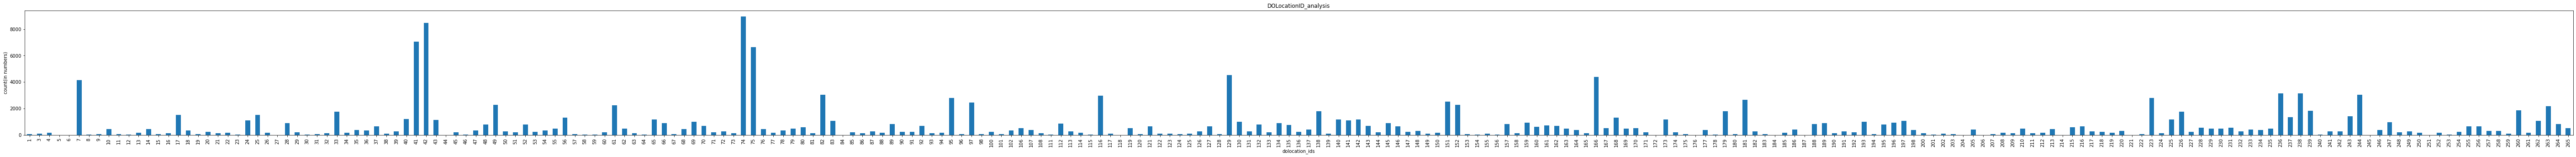

In [23]:
fig = plt.figure(figsize=(100,5))
bar_plot(taxi_df_m2, "DOLocationID", "dolocation_ids", "count(in numbers)", "DOLocationID_analysis")

In [24]:
#getting the DOLocation ID where maximum and minimum number of drop happened
max_doloc_id = taxi_df_m2["DOLocationID"].value_counts().keys()[0]
min_doloc_id = taxi_df_m2["DOLocationID"].value_counts().keys()[-1]
print("The maximum and minimum number of DOLOCATION_ID where taxi meter disengaged are {} and {} respectively.".format
     (max_doloc_id, min_doloc_id))

The maximum and minimum number of DOLOCATION_ID where taxi meter disengaged are 74 and 176 respectively.


### 3.5 PULocationID

<b><i>TLC Taxi Zone in which the taximeter was engaged.</i></b>

In [25]:
print("There are total {} types of 'PULocationID' present in the datatset.".
      format(len(taxi_df_m2["PULocationID"].unique())))

There are total 242 types of 'PULocationID' present in the datatset.


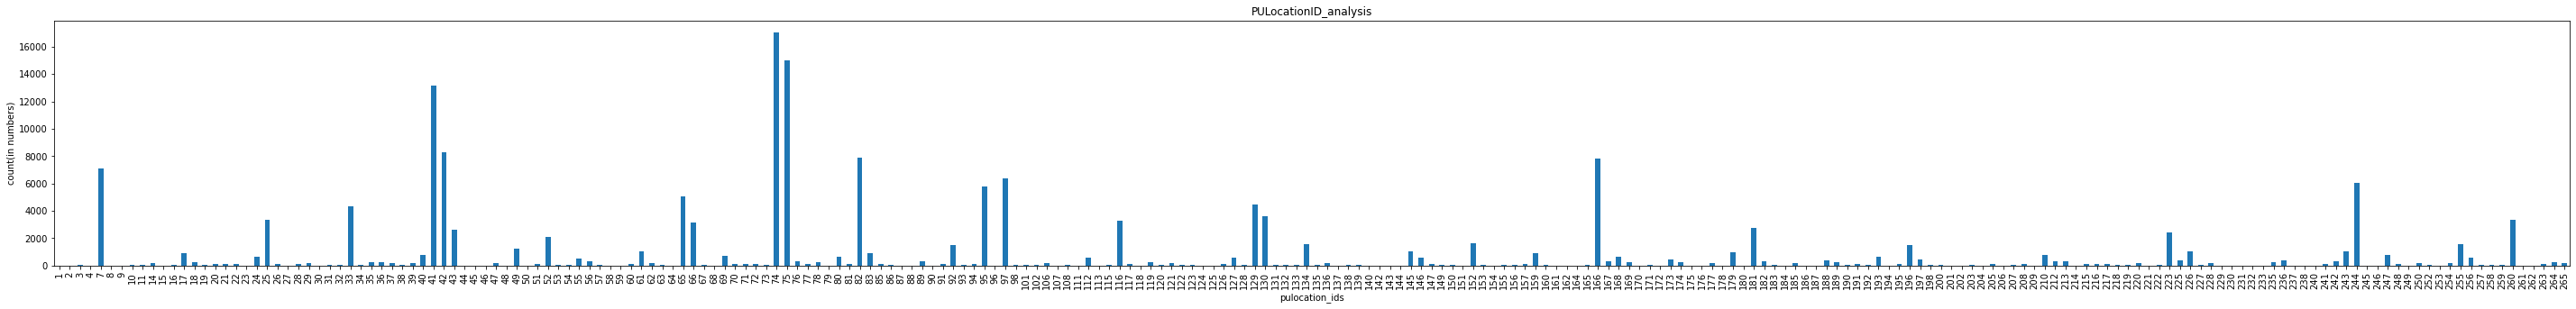

In [26]:
fig = plt.figure(figsize=(50,5))
bar_plot(taxi_df_m2, "PULocationID", "pulocation_ids", "count(in numbers)", "PULocationID_analysis")

In [27]:
#getting the PULocation ID where maximum and minimum number of pick up happened
max_puloc_id = taxi_df_m2["PULocationID"].value_counts().keys()[0]
min_puloc_id = taxi_df_m2["PULocationID"].value_counts().keys()[-1]
print("The maximum and minimum number of PULOCATION_ID where taxi meter engaged are {} and {} respectively.".format
     (max_puloc_id, min_puloc_id))

The maximum and minimum number of PULOCATION_ID where taxi meter engaged are 74 and 187 respectively.


### 3.5.1 PULocationID & DOLocationID combined analysis

In [28]:
taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts()

PULocationID  DOLocationID
75            74              2997
74            75              2675
41            42              2446
42            42              2052
7             7               2050
                              ... 
80            55                 1
              56                 1
              62                 1
              63                 1
70            192                1
Length: 11064, dtype: int64

<h3>Observation:</h3>
<li><b>It can be seen that 74 and 75 are the two most busy laoctions.</b></li> 
<li><b> Second popular locations are 42,41,7.</b></li>

In [29]:
# maximum travel location details between two area/ID
max_travel_location1 = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().keys()[0]
max_travel_location2 = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().keys()[1]
max_cnt1 = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().to_list()[0]
max_cnt2 = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().to_list()[1]
print("The maximum travel happened between {} and {} Location IDs.".format(max_travel_location1[0], max_travel_location1[1]))
print("The 2nd maximum travel happened between {} and {} Location IDs.".format(max_travel_location2[0], max_travel_location2[1]))
print("Maximum count is {}.".format(max_cnt1))
print("2nd Maximum count is {}.".format(max_cnt2))

print("\n")

# minimum travel location details between two area/ID
min_travel_location = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().keys()[-1]
min_cnt = taxi_df_m2[["PULocationID", "DOLocationID"]].value_counts().to_list()[-1]
print("The minimum travel happened between {} and {} Location IDs.".format(min_travel_location[0], min_travel_location[1]))
print("Minimum count is {}.".format(min_cnt))

The maximum travel happened between 75 and 74 Location IDs.
The 2nd maximum travel happened between 74 and 75 Location IDs.
Maximum count is 2997.
2nd Maximum count is 2675.


The minimum travel happened between 70 and 192 Location IDs.
Minimum count is 1.


In [30]:
taxi_df_m2[taxi_df_m2[["PULocationID", "DOLocationID"]].duplicated()]# checking for duplicate value

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
22,1.0,2020-03-01 00:05:58,2020-03-01 00:11:30,N,1.0,97,97,1.0,0.90,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2.0,1.0,0.00
26,2.0,2020-03-01 00:56:13,2020-03-01 01:01:12,N,1.0,223,223,1.0,1.49,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1.0,1.0,0.00
56,2.0,2020-03-01 00:16:14,2020-03-01 00:32:20,N,1.0,65,181,1.0,2.50,12.5,0.5,0.5,2.76,0.0,0.3,16.56,1.0,1.0,0.00
76,2.0,2020-03-01 00:29:12,2020-03-01 00:42:49,N,1.0,41,263,2.0,2.95,12.0,0.5,0.5,3.21,0.0,0.3,19.26,1.0,1.0,2.75
82,2.0,2020-03-01 00:15:22,2020-03-01 00:19:17,N,1.0,41,42,1.0,0.85,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176282,2.0,2020-03-31 23:00:30,2020-03-31 23:05:44,N,1.0,42,41,1.0,1.12,6.5,0.5,0.5,0.00,0.0,0.3,7.80,1.0,1.0,0.00
176283,2.0,2020-03-31 23:30:20,2020-03-31 23:53:07,N,1.0,254,41,1.0,11.08,31.5,0.5,0.5,0.00,0.0,0.3,34.75,1.0,1.0,0.00
176284,2.0,2020-03-31 23:01:37,2020-03-31 23:09:27,N,1.0,75,166,1.0,2.27,9.0,0.5,0.5,0.00,0.0,0.3,10.30,1.0,1.0,0.00
176285,2.0,2020-03-31 23:20:14,2020-03-31 23:23:34,N,1.0,43,236,1.0,0.85,5.0,0.5,0.5,0.00,0.0,0.3,9.05,1.0,1.0,2.75


### 3.6 passenger_count

<i><b>The number of passengers in the vehicle. This is a driver-entered value.</b></i>

In [31]:
taxi_df_m2["passenger_count"].value_counts().sort_index()

0.0       293
1.0    152175
2.0     12750
3.0      2540
4.0       915
5.0      4499
6.0      3104
7.0         4
8.0         4
9.0         2
Name: passenger_count, dtype: int64

In [32]:
#anomaly0
taxi_df_m2[taxi_df_m2["passenger_count"] == 0.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
960,2.0,2020-03-01 02:55:25,2020-03-01 02:55:30,N,5.0,80,80,0.0,0.08,35.0,0.00,0.0,7.06,0.0,0.3,42.36,1.0,2.0,0.00
1244,2.0,2020-03-01 03:29:49,2020-03-01 03:29:53,N,5.0,97,97,0.0,0.00,-21.0,0.00,0.0,0.00,0.0,-0.3,-21.30,4.0,2.0,0.00
1245,2.0,2020-03-01 03:29:49,2020-03-01 03:29:53,N,5.0,97,97,0.0,0.00,21.0,0.00,0.0,0.00,0.0,0.3,21.30,2.0,2.0,0.00
1566,2.0,2020-03-01 04:18:46,2020-03-01 04:18:52,N,5.0,112,112,0.0,0.11,20.0,0.00,0.0,0.00,0.0,0.3,20.30,1.0,2.0,0.00
1573,2.0,2020-03-01 04:44:06,2020-03-01 04:44:08,N,5.0,256,256,0.0,0.00,20.0,0.00,0.0,5.08,0.0,0.3,25.38,1.0,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175543,1.0,2020-03-31 10:19:11,2020-03-31 10:31:24,N,1.0,97,61,0.0,3.20,12.0,0.00,0.5,0.00,0.0,0.3,12.80,2.0,1.0,0.00
175604,1.0,2020-03-31 11:37:19,2020-03-31 12:07:04,N,1.0,25,244,0.0,13.20,39.0,2.75,0.5,0.00,0.0,0.3,42.55,1.0,1.0,2.75
175677,1.0,2020-03-31 12:39:36,2020-03-31 12:45:55,N,1.0,65,97,0.0,1.30,6.5,0.00,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
175763,1.0,2020-03-31 13:05:33,2020-03-31 13:06:00,N,5.0,243,243,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,3.0,2.0,0.00


In [33]:
#removed anomaly
taxi_df_m2 = taxi_df_m2[taxi_df_m2["passenger_count"] > 0.0]
taxi_df_m2.shape

(175993, 19)

<h3>Observation:</h3>
<li><b> Passenger count trend shows that most of the people like to travel alone.</b></li>
<li><b> Traveling in pair is also liked by few people.</b></li>

In [34]:
#anomaly1 found
taxi_df_m2[taxi_df_m2["passenger_count"] > 6]# more than 6 people are travelling together during corona.

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
14426,2.0,2020-03-02 15:50:43,2020-03-02 15:52:31,N,5.0,41,41,7.0,0.44,7.0,0.0,0.0,1.00,0.0,0.3,8.30,1.0,2.0,0.0
51226,2.0,2020-03-05 20:21:44,2020-03-05 20:21:46,N,5.0,264,264,8.0,0.00,8.0,0.0,0.0,1.66,0.0,0.3,9.96,1.0,2.0,0.0
80917,2.0,2020-03-08 14:47:56,2020-03-08 14:52:08,N,5.0,130,215,7.0,0.68,7.0,0.0,0.0,1.46,0.0,0.3,8.76,1.0,2.0,0.0
80941,2.0,2020-03-08 14:29:56,2020-03-08 14:29:58,N,5.0,264,264,8.0,0.00,8.0,0.0,0.0,1.66,0.0,0.3,9.96,1.0,2.0,0.0
127921,2.0,2020-03-13 16:11:13,2020-03-13 16:11:17,N,5.0,168,168,9.0,0.02,9.0,0.0,0.0,0.00,0.0,0.3,9.30,2.0,1.0,0.0
130884,2.0,2020-03-13 21:50:32,2020-03-13 22:30:43,N,5.0,130,265,7.0,29.27,75.0,0.0,0.0,15.06,0.0,0.3,90.36,1.0,2.0,0.0
132955,2.0,2020-03-14 09:41:40,2020-03-14 09:54:49,N,5.0,243,119,7.0,2.85,7.0,0.0,0.0,0.00,0.0,0.3,7.30,2.0,2.0,0.0
148974,2.0,2020-03-17 07:40:00,2020-03-17 07:41:27,N,5.0,243,243,8.0,0.00,8.0,0.0,0.0,2.00,0.0,0.3,10.30,1.0,2.0,0.0
150899,2.0,2020-03-17 16:04:43,2020-03-17 16:04:47,N,5.0,116,116,8.0,0.00,8.0,0.0,0.0,1.66,0.0,0.3,9.96,1.0,2.0,0.0
164776,2.0,2020-03-22 07:32:51,2020-03-22 07:33:01,N,5.0,242,264,9.0,0.10,9.0,0.0,0.0,0.00,0.0,0.3,9.30,1.0,2.0,0.0


In [35]:
# anomaly1 cleared
taxi_df_m2_a1 = taxi_df_m2[taxi_df_m2["passenger_count"] <= 6]# 10 rows removed which contained passenger count more than 6
print(taxi_df_m2_a1.shape)

(175983, 19)


### 3.7 trip_type

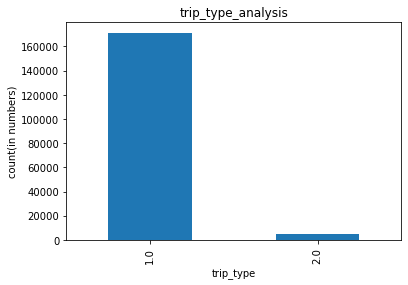

In [36]:
bar_plot(taxi_df_m2_a1, "trip_type", "trip_type", "count(in numbers)", "trip_type_analysis")

### 3.8 payment_type

<b><i>A numeric code signifying how the passenger paid for the trip.</i></b>

<li> 1= Credit card</li>
<li> 2= Cash</li>
<li> 3= No charge</li>
<li> 4= Dispute</li>
<li> 5= Unknown</li>

In [37]:
taxi_df_m2_a1["payment_type"].value_counts().sort_index()

1.0    93039
2.0    81461
3.0     1129
4.0      349
5.0        5
Name: payment_type, dtype: int64

#### Categorical Data Observations:
<li>Credit card and cash are widely used to pay trips bill.</li>

### 3.9 trip_distance

In [38]:
taxi_df_m2_a1["trip_distance"].describe()

count    175983.000000
mean          2.693367
std           3.325616
min           0.000000
25%           0.940000
50%           1.650000
75%           3.100000
max          56.510000
Name: trip_distance, dtype: float64

In [39]:
#outlier detection - big change in trip distance,but it can be logical as green taxi can drop outside the city as well.
unique_dist_list = sorted(list(taxi_df_m2_a1['trip_distance'].unique()))
for i in range(0,91,10):
    print("{}th percentile is: {}.".format(i,np.percentile(unique_dist_list, i)))
for i in range(91,101):
    print("{}th percentile is: {}.".format(i,np.percentile(unique_dist_list, i)))

0th percentile is: 0.0.
10th percentile is: 2.67.
20th percentile is: 5.34.
30th percentile is: 8.01.
40th percentile is: 10.68.
50th percentile is: 13.35.
60th percentile is: 16.1.
70th percentile is: 18.929999999999996.
80th percentile is: 22.13.
90th percentile is: 26.35.
91th percentile is: 26.827000000000005.
92th percentile is: 27.422000000000004.
93th percentile is: 28.104.
94th percentile is: 28.991999999999976.
95th percentile is: 29.465.
96th percentile is: 30.283999999999985.
97th percentile is: 31.321000000000016.
98th percentile is: 32.302.
99th percentile is: 34.76100000000005.
100th percentile is: 56.51.


In [40]:
#trip distance is 0.0 but fair amount is negative
#anomaly2
taxi_df_m2_a1[(taxi_df_m2_a1["trip_distance"] == 0.0) & (taxi_df_m2_a1["fare_amount"] <= 0.0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1034,2.0,2020-03-01 02:15:19,2020-03-01 02:17:33,N,1.0,41,41,1.0,0.0,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,3.0,1.0,0.0
2251,1.0,2020-03-01 08:36:13,2020-03-01 08:36:23,N,1.0,60,60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
2310,1.0,2020-03-01 09:48:56,2020-03-01 09:49:14,N,5.0,159,159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
2465,1.0,2020-03-01 09:48:31,2020-03-01 09:48:31,Y,5.0,173,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
3779,2.0,2020-03-01 12:50:39,2020-03-01 12:51:58,N,1.0,265,265,1.0,0.0,-3.0,0.0,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174672,1.0,2020-03-30 13:50:28,2020-03-30 13:50:43,N,5.0,242,242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
174689,2.0,2020-03-30 13:44:32,2020-03-30 13:44:36,N,5.0,139,139,1.0,0.0,-150.0,0.0,0.0,0.0,0.0,-0.3,-150.3,3.0,2.0,0.0
175473,2.0,2020-03-31 09:39:13,2020-03-31 09:39:31,N,1.0,74,74,1.0,0.0,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,3.0,1.0,0.0
175762,1.0,2020-03-31 13:04:14,2020-03-31 13:04:58,N,5.0,243,243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0


In [41]:
#cleared anomaly
#removed all fare amount which is less than 0 and trip distance is equal or greater than 0
taxi_df_m2_a2 = taxi_df_m2_a1[(taxi_df_m2_a1["trip_distance"] >= 0.0) & (taxi_df_m2_a1["fare_amount"] > 0.0)]
taxi_df_m2_a2.shape

(174741, 19)

### 3.10 fare_amount

In [42]:
taxi_df_m2_a2["fare_amount"].describe()

count    174741.000000
mean         12.275772
std          10.477578
min           0.010000
25%           6.500000
50%           9.000000
75%          14.200000
max         390.000000
Name: fare_amount, dtype: float64

In [43]:
#Here we are selecting 50 dollars(completely intutive) as the threshold. This may be due to fine for those people who
#booked the cab but didn't show up
#anomaly3
taxi_df_m2_a2[(taxi_df_m2_a2["trip_distance"] == 0.0) & (taxi_df_m2_a2["fare_amount"] > 50)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
803,2.0,2020-03-01 02:01:49,2020-03-01 02:01:54,N,5.0,196,196,1.0,0.0,180.0,0.0,0.0,0.00,0.00,0.3,180.30,2.0,2.0,0.0
1004,2.0,2020-03-01 02:44:07,2020-03-01 02:52:56,N,5.0,56,56,3.0,0.0,60.0,0.0,0.0,0.00,0.00,0.3,60.30,2.0,2.0,0.0
1320,2.0,2020-03-01 03:08:53,2020-03-01 03:11:39,N,5.0,80,80,2.0,0.0,85.0,0.0,0.0,5.00,0.00,0.3,90.30,1.0,2.0,0.0
2234,2.0,2020-03-01 09:03:01,2020-03-01 09:03:25,N,2.0,52,52,1.0,0.0,52.0,0.0,0.5,0.00,0.00,0.3,52.80,2.0,1.0,0.0
2250,2.0,2020-03-01 08:06:57,2020-03-01 08:06:59,N,5.0,132,264,1.0,0.0,68.0,0.0,0.0,17.08,0.00,0.3,85.38,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174690,2.0,2020-03-30 13:44:32,2020-03-30 13:44:36,N,5.0,139,139,1.0,0.0,150.0,0.0,0.0,0.00,0.00,0.3,150.30,2.0,2.0,0.0
174713,2.0,2020-03-30 13:28:36,2020-03-30 13:28:38,N,5.0,264,264,1.0,0.0,54.0,0.0,0.0,25.00,0.00,0.3,79.30,1.0,2.0,0.0
174966,1.0,2020-03-30 17:15:43,2020-03-30 18:03:22,N,1.0,41,117,1.0,0.0,56.2,0.0,0.5,0.00,8.41,0.3,65.41,1.0,1.0,0.0
174990,1.0,2020-03-30 17:33:28,2020-03-30 17:33:49,N,5.0,74,74,1.0,0.0,65.0,0.0,0.0,0.00,0.00,0.0,65.00,1.0,2.0,0.0


In [44]:
#cleared anomaly
taxi_df_m2_a3 = taxi_df_m2_a2[(taxi_df_m2_a2["trip_distance"] >= 0.0) & (taxi_df_m2_a2["fare_amount"] <= 50)]
taxi_df_m2_a3.shape

(172046, 19)

### 3.11 extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, congestion_surcharge

In [45]:
#numerical data
num_list = ['extra', 'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
taxi_df_m2_a3[num_list].describe()

,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
count,172046.000000,172046.000000,172046.000000,172046.000000,172046.000000,172046.000000
mean,0.390093,0.487745,1.127461,0.107686,0.298415,0.446754
std,0.573937,0.077720,2.532974,0.818340,0.021749,1.014272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.300000,0.000000
50%,0.000000,0.500000,0.000000,0.000000,0.300000,0.000000
75%,0.500000,0.500000,1.960000,0.000000,0.300000,0.000000
max,3.750000,3.550000,449.970000,22.000000,0.300000,2.750000


In [46]:
#outlier
#max tip amount is very high
uunique_tip_amount_list = sorted(list(taxi_df_m2_a3["tip_amount"].unique()))
for i in range(0,101,10):
    print("{}th percentile is: {}.".format(i,np.percentile(uunique_tip_amount_list, i)))
for i in range(90,101,1):
    print("{}th percentile is: {}.".format(i,np.percentile(uunique_tip_amount_list, i)))

0th percentile is: 0.0.
10th percentile is: 1.166.
20th percentile is: 2.3120000000000003.
30th percentile is: 3.4680000000000004.
40th percentile is: 4.694000000000001.
50th percentile is: 5.98.
60th percentile is: 7.256.
70th percentile is: 8.642.
80th percentile is: 10.078000000000001.
90th percentile is: 12.197999999999999.
100th percentile is: 449.97.
90th percentile is: 12.197999999999999.
91th percentile is: 12.6292.
92th percentile is: 13.131200000000007.
93th percentile is: 13.569000000000008.
94th percentile is: 14.16479999999999.
95th percentile is: 15.411000000000007.
96th percentile is: 17.227999999999998.
97th percentile is: 21.127999999999975.
98th percentile is: 29.96879999999997.
99th percentile is: 49.940000000000055.
100th percentile is: 449.97.


In [47]:
#99th percentile value of tip amount is under 50 dollars, but 1% amount is more than that.
#As this will considered as an outlier, we'll remove it.
taxi_df_m2_a3[taxi_df_m2_a3["tip_amount"] > 50]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1211,2.0,2020-03-01 02:18:29,2020-03-01 02:35:57,N,1.0,74,224,1.0,5.76,20.0,0.5,0.5,60.00,0.0,0.3,84.05,1.0,1.0,2.75
38338,2.0,2020-03-04 19:32:50,2020-03-04 19:40:11,N,1.0,166,166,1.0,0.79,6.5,1.0,0.5,100.00,0.0,0.3,108.30,1.0,1.0,0.00
55148,2.0,2020-03-06 09:37:40,2020-03-06 09:41:08,N,1.0,55,55,1.0,0.76,5.0,0.0,0.5,284.20,0.0,0.3,290.00,1.0,1.0,0.00
58672,1.0,2020-03-06 15:08:53,2020-03-06 15:08:57,N,1.0,75,75,1.0,1.70,2.5,0.0,0.5,147.00,0.0,0.3,150.30,1.0,1.0,0.00
77395,2.0,2020-03-08 01:59:14,2020-03-08 03:22:19,N,1.0,80,14,1.0,10.93,31.0,0.5,0.5,75.00,0.0,0.3,107.30,1.0,1.0,0.00
85673,2.0,2020-03-09 02:14:54,2020-03-09 02:15:25,N,1.0,265,265,1.0,0.00,2.5,0.5,0.5,127.00,0.0,0.3,130.80,1.0,1.0,0.00
91537,2.0,2020-03-09 16:55:23,2020-03-09 17:08:03,N,1.0,61,17,1.0,2.18,10.5,1.0,0.5,449.97,0.0,0.3,462.27,1.0,1.0,0.00
116260,2.0,2020-03-12 11:56:36,2020-03-12 11:57:03,N,1.0,1,1,2.0,0.00,2.5,0.0,0.5,57.80,0.0,0.3,61.10,1.0,1.0,0.00
124807,2.0,2020-03-13 10:53:59,2020-03-13 11:06:52,N,1.0,174,185,1.0,2.56,11.0,0.0,0.5,404.12,0.0,0.3,415.92,1.0,1.0,0.00
163717,2.0,2020-03-21 14:54:03,2020-03-21 18:15:02,N,5.0,244,244,1.0,21.25,40.0,0.0,0.0,100.00,0.0,0.3,143.05,1.0,2.0,2.75


In [48]:
#outlier reduction
taxi_df_m2_a4 = taxi_df_m2_a3[taxi_df_m2_a3["tip_amount"] <= 50]


In [49]:
print("The dataset size before cleaning is",taxi_df.shape)
print("The dataset size after cleaning is",taxi_df_m2_a4.shape)

The dataset size before cleaning is (223406, 20)
The dataset size after cleaning is (172033, 19)


### 3.12 Datetime  analysis

<b>lpep_pickup_datetime</b>
The date and time when the meter was engaged. 

<b>lpep_dropoff_datetime</b>
The date and time when the meter was disengaged. 

In [50]:
#we have taken only pickup time for per day and per hour analysis
taxi_df_m2_a4["lpep_pickup_datetime"]

0         2020-03-01 00:20:18
1         2020-03-01 00:15:42
2         2020-03-01 00:36:18
3         2020-03-01 00:22:14
4         2020-03-01 00:07:22
                 ...         
176282    2020-03-31 23:00:30
176283    2020-03-31 23:30:20
176284    2020-03-31 23:01:37
176285    2020-03-31 23:20:14
176286    2020-03-31 23:31:48
Name: lpep_pickup_datetime, Length: 172033, dtype: object

#### 3.12.1 Number of Trips per day

In [51]:
taxi_df_m2_a4['lpep_pickup_datetime'].values

array(['2020-03-01 00:20:18', '2020-03-01 00:15:42',
       '2020-03-01 00:36:18', ..., '2020-03-31 23:01:37',
       '2020-03-31 23:20:14', '2020-03-31 23:31:48'], dtype=object)

In [52]:
#We are using datetime library to convert the "%Y-%m-%d %H:%M:%S" format only into date

#initializing list to store dates
date_list = list()
#iterating date time from dataframe
for val in taxi_df_m2_a4['lpep_pickup_datetime'].values:
    #converting below format to single strings
    d = dt.datetime.strptime(val, "%Y-%m-%d %H:%M:%S")
    #getting only date string
    only_date = d.strftime('%d')
    #appending the date string into a list
    date_list.append(only_date)

In [59]:
#mapping date list into a new column
taxi_df_m2_a4.loc[:,"only_date"] = date_list

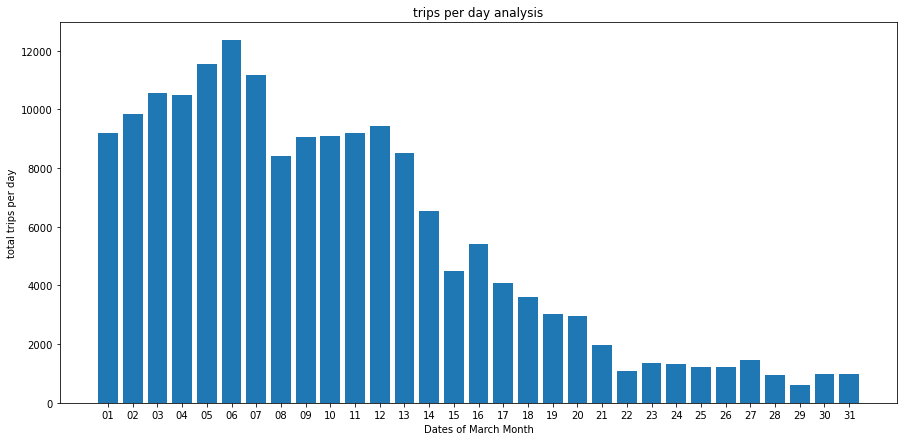

In [54]:
#setting figure size
fig = plt.figure(figsize=(15,7))
#x axis values - date as keys
x_date = taxi_df_m2_a4["only_date"].value_counts().sort_index().keys()
y_date = taxi_df_m2_a4["only_date"].value_counts().sort_index().values
plt.bar(x_date, y_date)
plt.xlabel("Dates of March Month")
plt.ylabel("total trips per day")
plt.title("trips per day analysis")
plt.show()

#### 3.12.1 Number of Trips per hour on 1st March 2020

In [55]:
#initializing list to store hours
hour_list = list()
#iterating date time from dataframe
for val in taxi_df_m2_a4['lpep_pickup_datetime'].values:
    #converting below format to single strings
    d = dt.datetime.strptime(val, "%Y-%m-%d %H:%M:%S")
    #getting only date string
    only_hour = d.strftime('%H')
    #appending the date string into a list
    hour_list.append(only_hour)

In [56]:
#mapping date list into a new column
taxi_df_m2_a4.loc[:,"only_hour"] = hour_list

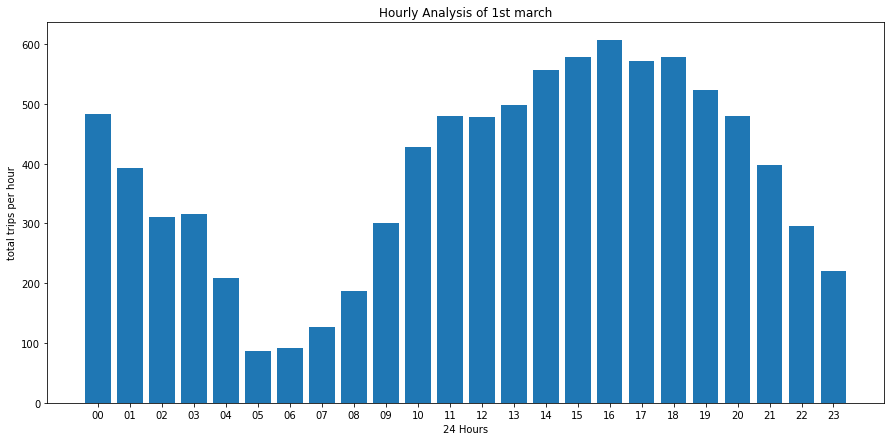

In [57]:
#setting figure size
fig = plt.figure(figsize=(15,7))
#x axis values - date as keys
x_date = taxi_df_m2_a4[taxi_df_m2_a4["only_date"] == "01"]["only_hour"].value_counts().sort_index().keys()
y_date = taxi_df_m2_a4[taxi_df_m2_a4["only_date"] == "01"]["only_hour"].value_counts().sort_index().values
plt.bar(x_date, y_date)
plt.xlabel("24 Hours")
plt.ylabel("total trips per hour")
plt.title("Hourly Analysis of 1st march")
plt.show()

### Hourly Analysis Observation:

From above graph we can observe that during 4PM, the trip count is very high, where as during morning it is very low. This single day analysis gives us a good idea about during what time green cabs should be available in large amount.

## 4. Datashape details after analysis:

In [58]:
print("Datashape before analysis: ",taxi_df.shape)
print("Datashape after analysis: ",taxi_df_m2_a4.shape)
print("\n{}% of data has been kept after analysis.".format((len(taxi_df_m2_a4)/len(taxi_df))*100))

Datashape before analysis:  (223406, 20)
Datashape after analysis:  (172033, 21)

77.00464624942929% of data has been kept after analysis.


I removed one column and added two more as date_only and hour_only for date and hour analysis. Also 22% approx data has been removed.

# Conclusion:

After doing extensive analysis I came down to the following conclusions:

<b>COVID-19 Impact:</b>
* Due to COVID-19, and following imposed lockdown the green taxi business imapcted highly and the number of per day trip fall down drastically after the 2nd week of March. 

<b>General Analysis</b>
* As most of the data are not forwarded directly to the server on real time(due to many cabs don't have server connected with their digital meters), many inconsistencies found in the dataset.
* The frequently visited(both up and down) places in the New York City has location ID 74 and 75.
* Travellers generally preffered alone(90% approx) rides over the group or pair trips.
* 99 percentile of trips are in within the city limits.
* Travellers generally preffered credit card or cash to pay the fair amount.

<b>Anomaly</b>
* Many of the rows had amount column in negative units.
* Trip distance was 0, but fair amount was more than $50.